## Performance comparison for multiple models
#### Same basic architecture with 5 CNN layers and 2 fully connected layers. Dropout and BatchNormalization layers added/removed

In [ ]:
def cnn5_model2(fc1_n=100, dp_cnn1=0.1, dp_cnn2=0.1, dp_cnn3=0.2, dp_cnn4=0.2, dp_cnn5=0.2, dp_fc1=0.3, l2_reg=0):    
    model=Sequential()

    model.add(Conv2D(16, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(img_height, img_width, 3),kernel_regularizer=l2(l2_reg), bias_regularizer=l2(l2_reg)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(dp_cnn1))

    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu', kernel_regularizer=l2(l2_reg), bias_regularizer=l2(l2_reg)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(dp_cnn2))

    model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu', kernel_regularizer=l2(l2_reg), bias_regularizer=l2(l2_reg)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(dp_cnn3))

    model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu', kernel_regularizer=l2(l2_reg), bias_regularizer=l2(l2_reg)))
    model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu', kernel_regularizer=l2(l2_reg), bias_regularizer=l2(l2_reg)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(dp_cnn4))

    model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), activation='relu', kernel_regularizer=l2(l2_reg), bias_regularizer=l2(l2_reg)))
    model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), activation='relu', kernel_regularizer=l2(l2_reg), bias_regularizer=l2(l2_reg)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(dp_cnn5))

    model.add(Flatten())
    
    model.add(Dense(fc1_n, activation='relu', kernel_regularizer=l2(l2_reg), bias_regularizer=l2(l2_reg)))
    model.add(Dropout(dp_fc1))
            
    model.add(Dense(1, activation='sigmoid'))
    model.build(input_shape=(img_height, img_width, 3))
        
    return model

### Train-validation-test split data
#### Data split: train 80%, validation 10% and test 10%
#### Cracked images for train set augmented using keras ImageDataGenerator

In [10]:
data={'train_original': [2088, 17382], 'train_augmented':[19560,17382], 'validation':[260,2172], 'test':[260, 2172]}
pd.DataFrame(data, index=['Cracked','Non-cracked'])

,train_original,train_augmented,validation,test
Cracked,2088,19560,260,260
Non-cracked,17382,17382,2172,2172


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

path='/storage/Crack_detection/Dataset2/Crack_detection/opt2'
df= pd.read_csv(os.path.join(path, 'summary_all_020421.csv'))

### Plot dependence on learning rate (all the other hyperparameters are constant)

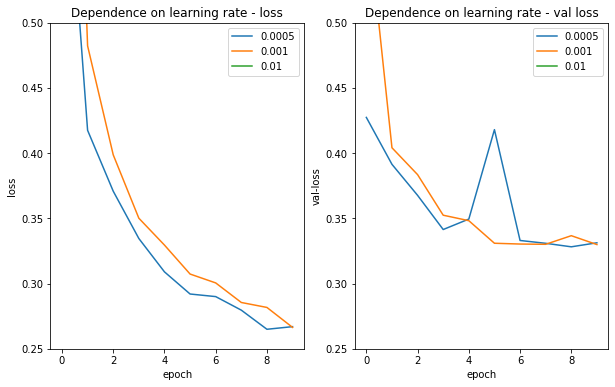

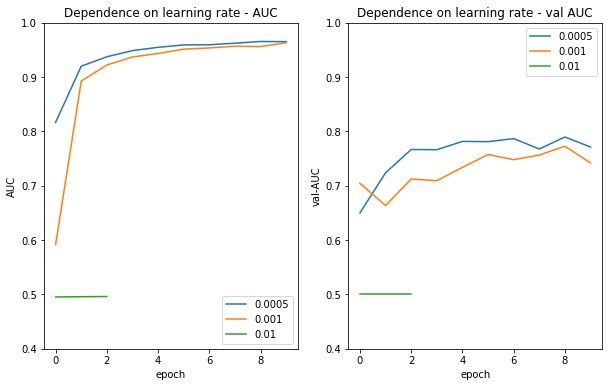

In [12]:
gdf=df[(df.model_index==0) | (df.model_index==1) | (df.model_index==7)].groupby('learning_rate')
fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='loss',ax=ax[0], label=label, title='Dependence on learning rate - loss')
    ax[0].set_ylabel('loss')
    ax[0].set_ylim(0.25,0.5)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_loss',ax=ax[1], label=label, title='Dependence on learning rate - val loss')
    ax[1].set_ylabel('val-loss')
    ax[1].set_ylim(0.25,0.5)
    
fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='auc',ax=ax[0], label=label, title='Dependence on learning rate - AUC')
    ax[0].set_ylabel('AUC')
    ax[0].set_ylim(0.4,1)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_auc',ax=ax[1], label=label, title='Dependence on learning rate - val AUC')
    ax[1].set_ylabel('val-AUC')
    ax[1].set_ylim(0.4,1)

### Plot dependence on dropout (all the other hyperparameters are constant) 

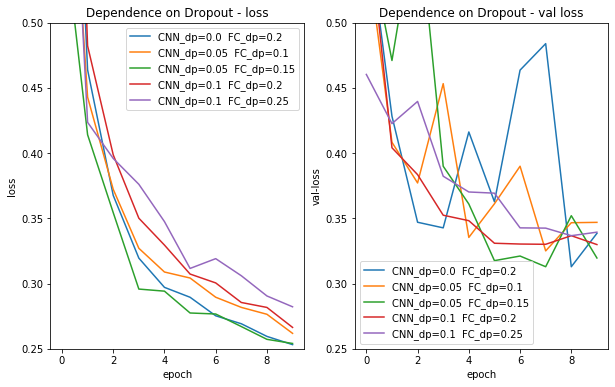

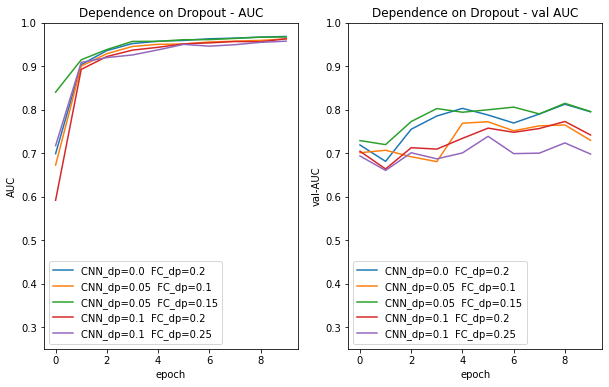

In [13]:
temp_df=df.copy()
temp_df=temp_df.assign(Dropout = lambda x: ('CNN_dp='+x['dp_cnn1'].astype(str)+'  FC_dp='+x['dp_fc1'].astype(str)))
gdf=temp_df[(temp_df.model_index==1) | (temp_df.model_index==4) | (temp_df.model_index==6) | (temp_df.model_index==10) | (temp_df.model_index==11)].groupby('Dropout')
fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='loss',ax=ax[0], label=label, title='Dependence on Dropout - loss')
    ax[0].set_ylabel('loss')
    ax[0].set_ylim(0.25,0.5)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_loss',ax=ax[1], label=label, title='Dependence on Dropout - val loss')
    ax[1].set_ylabel('val-loss')
    ax[1].set_ylim(0.25,0.5)
    
fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='auc',ax=ax[0], label=label, title='Dependence on Dropout - AUC')
    ax[0].set_ylabel('AUC')
    ax[0].set_ylim(0.25,1)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_auc',ax=ax[1], label=label, title='Dependence on Dropout - val AUC')
    ax[1].set_ylabel('val-AUC')
    ax[1].set_ylim(0.25,1)

### Plot dependence on batch_size (all the other hyperparameters are constant)

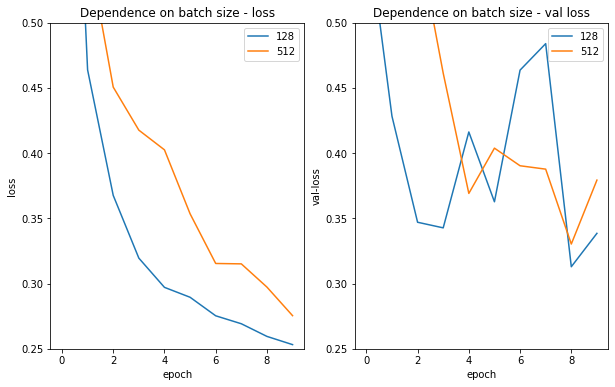

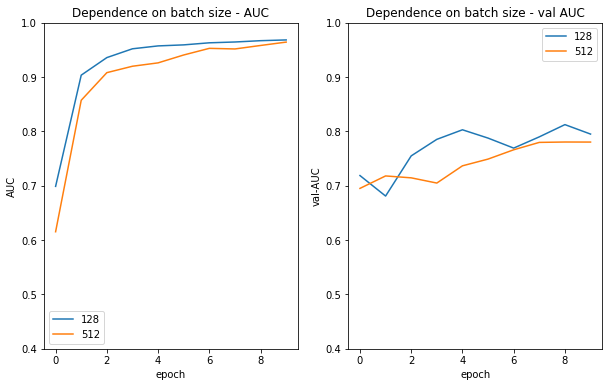

In [14]:
gdf=df[(df.model_index==6) | (df.model_index==9) ].groupby('batch_size')
fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='loss',ax=ax[0], label=label, title='Dependence on batch size - loss')
    ax[0].set_ylabel('loss')
    ax[0].set_ylim(0.25,0.5)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_loss',ax=ax[1], label=label, title='Dependence on batch size - val loss')
    ax[1].set_ylabel('val-loss')
    ax[1].set_ylim(0.25,0.5)
    
fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='auc',ax=ax[0], label=label, title='Dependence on batch size - AUC')
    ax[0].set_ylabel('AUC')
    ax[0].set_ylim(0.4,1)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_auc',ax=ax[1], label=label, title='Dependence on batch size - val AUC')
    ax[1].set_ylabel('val-AUC')
    ax[1].set_ylim(0.4,1)

### Plot dependence on BatchNormalization (all the other hyperparameters are constant)

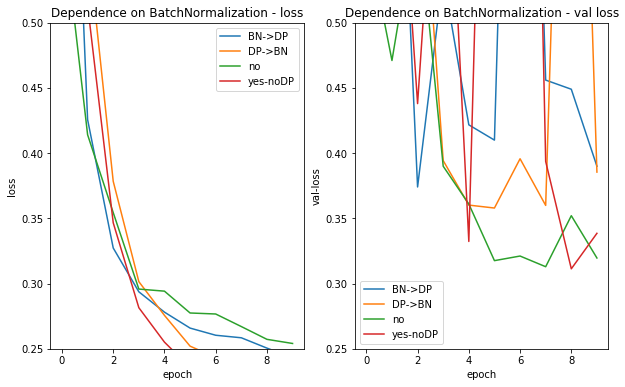

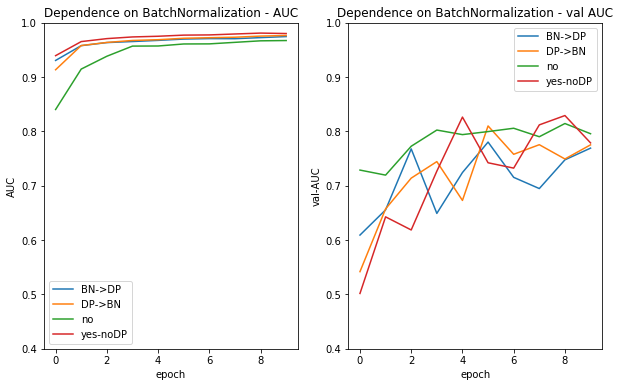

In [15]:
gdf=df[(df.model_index==2) | (df.model_index==3) | (df.model_index==4)| (df.model_index==5)].groupby('BatchNormalization')
fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='loss',ax=ax[0], label=label, title='Dependence on BatchNormalization - loss')
    ax[0].set_ylabel('loss')
    ax[0].set_ylim(0.25,0.5)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_loss',ax=ax[1], label=label, title='Dependence on BatchNormalization - val loss')
    ax[1].set_ylabel('val-loss')
    ax[1].set_ylim(0.25,0.5)
    
fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=2)
for label, temp in gdf:
    temp.plot(x='epoch',y='auc',ax=ax[0], label=label, title='Dependence on BatchNormalization - AUC')
    ax[0].set_ylabel('AUC')
    ax[0].set_ylim(0.4,1)

for label, temp in gdf:
    temp.plot(x='epoch',y='val_auc',ax=ax[1], label=label, title='Dependence on BatchNormalization - val AUC')
    ax[1].set_ylabel('val-AUC')
    ax[1].set_ylim(0.4,1)